In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
house=pd.read_csv('/content/drive/MyDrive/house (2).csv')

In [ ]:
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
house.shape

(4600, 18)

In [ ]:
house.size

82800

In [ ]:
house.ndim

2

In [ ]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

<Axes: xlabel='bedrooms', ylabel='price'>

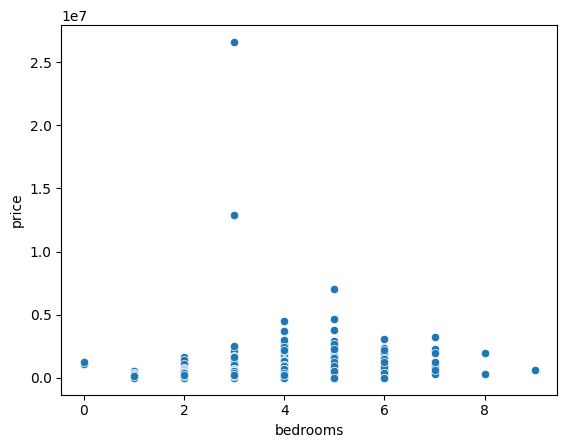

In [ ]:
sns.scatterplot(x=house['bedrooms'],y=house['price'])

<Axes: >

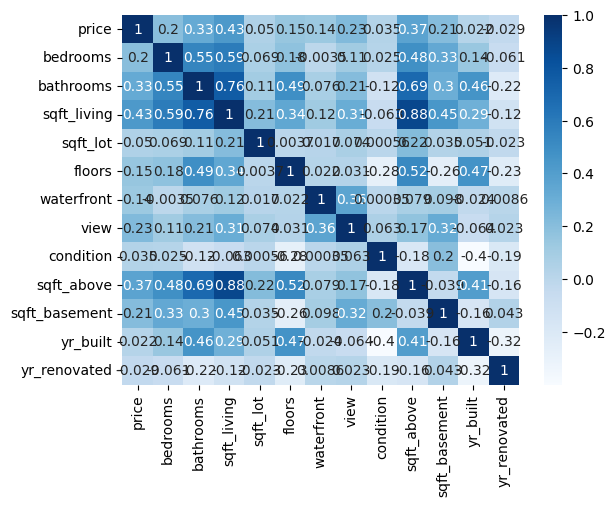

In [ ]:
sns.heatmap(house.corr(numeric_only=True),cmap='Blues',annot=True)

<Axes: xlabel='bedrooms'>

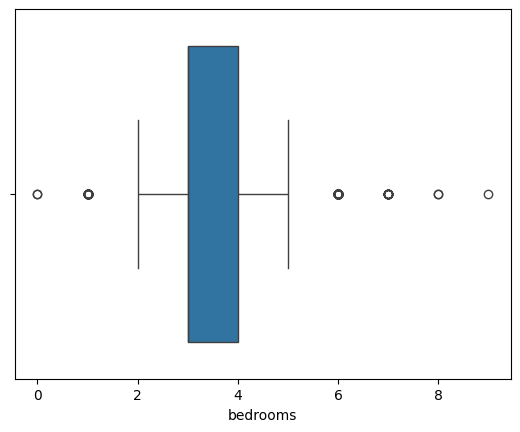

In [ ]:
sns.boxplot(x=house['bedrooms'])

In [ ]:
house.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
x=house[['sqft_living']]
y=house['price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,sqft_living
1898,2770
1370,3720
3038,2810
2361,4030
156,2000
...,...
4426,1180
466,2520
3092,1150
3772,910


In [ ]:
x_test

,sqft_living
3683,1460
4411,2000
2584,2940
69,2200
1844,1720
...,...
1612,1700
1068,1930
4350,1180
3027,2370


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
prediction

array([ 364098.33163107,  508399.10707922,  759589.34582231,
        561843.83872669,  433576.48277277,  727522.50683383,
        540465.9460677 ,  532449.23632058,  527104.76315584,
        537793.70948533,  783639.47506367,  227814.26593003,
        834411.97012876,  535121.47290296,  398837.40720192,
        756917.10923994,  692783.43126298,  690111.19468061,
        882512.22861148,  954662.61633556,  724850.27025146,
        703472.37759247,  604599.62404466,  511071.3436616 ,
        195747.42694155,  182386.24402969,  674077.77518637,
        818378.55063452,  332031.49264259,  652699.88252738,
       1633410.70825837,  299964.65365411, 1221886.27457289,
        588566.20455042,  273242.28783038,  543138.18265008,
        871823.28228199,  962679.32608268,  294620.18048936,
        585893.96796805,  422887.53644328,  374787.27796056,
        516415.81682634,  462971.08517888,  310653.5999836 ,
        324014.78289547,  487021.21442024,  543138.18265008,
        818378.55063452,

In [ ]:
c=model.intercept_
c

np.float64(-26048.2093954297)

In [ ]:
m=model.coef_
m

array([267.22365824])

In [ ]:
s=house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]
t=house['price']

In [ ]:
s

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [ ]:
s_train,s_test,t_train,t_test=train_test_split(s,t,test_size=0.2,random_state=42)

In [ ]:
s_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1898,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,1989,0
1370,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,1991,0
3038,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,1982,0
2361,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,2006,0
156,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,1916,1986
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,3.0,1.00,1180,5002,1.5,0,0,3,1180,0,1946,0
466,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007
3092,3.0,1.00,1150,8145,1.0,0,0,4,990,160,1932,1958
3772,2.0,1.00,910,2002,1.5,0,0,3,910,0,1900,2005


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(s_train,t_train)

LinearRegression()

In [ ]:
prediction = model.predict(s_test)

In [ ]:
prediction

array([ 304863.38578076,  326517.06991516, 1071762.53630098,
        546241.40097359,  379799.98321087,  605792.9362275 ,
        481263.57120657,  418905.11058143,  509341.50791926,
        530852.97588255,  682958.97641218,  414525.36130069,
        836974.40259905,  416500.85730826,  367263.4338823 ,
        702908.51672181,  677878.69067807,  515539.32998557,
       1019380.63891391,  861119.79490667, 1364866.21814685,
        637439.70016771,  634739.5666634 ,  470424.21250268,
        162037.1538305 ,  232831.37648252,  669951.05071604,
        884080.66694998,  263027.2257721 ,  974954.64229479,
       1883342.16391312,  481510.29664868, 1275554.65253673,
        430994.93178867,  180366.40705427,  339240.17357425,
        792335.74094019, 1011053.14613377,  238036.20927684,
        543438.66040786,  423414.50597295,  243429.92107977,
        390151.30073943,  361322.67375659,  320343.34636021,
        317865.29287651,  469559.60646627,  573249.20158981,
        828966.75691607,

In [ ]:
c=model.intercept_
c

np.float64(4925638.066193099)

In [ ]:
m=model.coef_
m

array([-6.44974616e+04,  3.65204407e+04,  1.86049845e+02, -5.14414161e-01,
        6.98247401e+04,  3.82459666e+05,  4.47558418e+04,  2.93355394e+04,
        9.68608171e+01,  8.91890277e+01, -2.56916353e+03,  8.25991734e+00])

In [ ]:
newdata=[[4,2,1600,2000,2,1,3,1,600,1000,2005,2010]]

In [ ]:
predict_new=model.predict(newdata)
print("The Predicted Price" , predict_new)

The Predicted Price [735787.30371693]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
